In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def graficar(f, x_i, x_f, num=1000):
    plt.style.use('seaborn')
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

def metodo_biseccion(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    while n <= num:
        p_i = (a + b)/2
        if verbose==1:
            print(f'ite:{n}, a:{a:.5f}, b:{b:.5f}, p_{n}:{p_i:.5f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(b - a)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_regulafalsi(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    p_0 = a
    while n <= num:
        p_i = a - f(a)*((b-a)/(f(b) - f(a)))
        if verbose==1:
            print(f'ite:{n}, a:{a:.9f}, b:{b:.9f}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_newton_raphson(f, df, p_0, tol=1e-4, num=100, verbose=2):
    n = 1
    if verbose==1:
        print(f'ite:0, p_0:{p_0:.9f}')
    while n <= num:
        if df(p_0) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_i = p_0 - f(p_0)/df(p_0)
        if verbose==1:
            print(f'ite:{n}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==2:
                print(f'Solución exacta encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

# Punto 1

In [12]:
f= lambda x: abs(x) - np.cos(x)
# si x<0
df1= lambda x: -1 + np.sin(x)
# si x>0
df2= lambda x: 1 + np.sin(x)

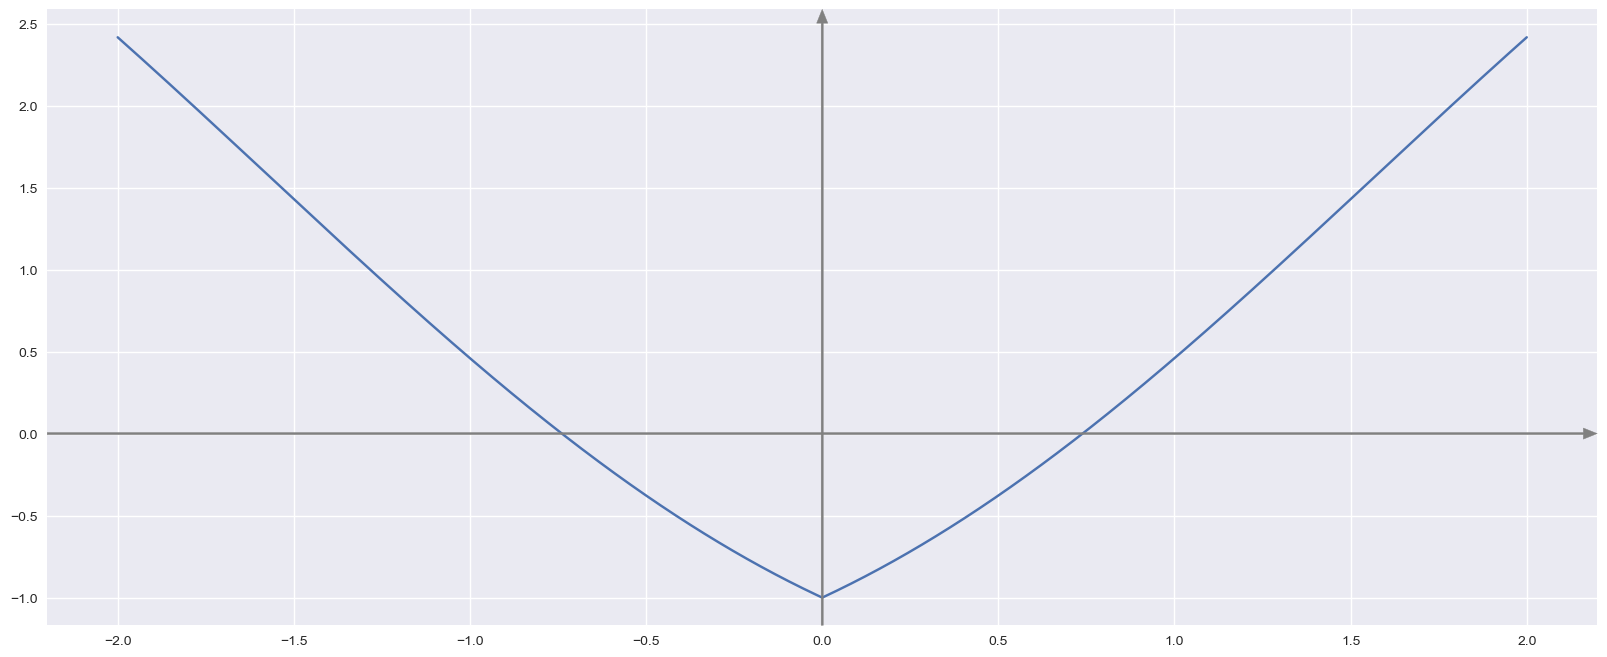

In [4]:
graficar(f, -2, 2)

In [25]:
#primera solución
metodo_biseccion(f, -2, 0, tol=1e-5)
metodo_regulafalsi(f, -2, 0, tol=1e-5)
metodo_newton_raphson(f, df1, -1, tol=1e-5)

Solución aproximada encontrada: -0.7390861511230469
número de iteraciones: 19
Solución aproximada encontrada: -0.7390844046086178
número de iteraciones: 7
Solución exacta encontrada: -0.7390851332151607
número de iteraciones: 4


-0.7390851332151607

In [26]:
#segunda solución
metodo_biseccion(f, 0, 2, tol=1e-5)
metodo_regulafalsi(f, 0, 2, tol=1e-5)
metodo_newton_raphson(f, df2, 1, tol=1e-5)

Solución aproximada encontrada: 0.7390861511230469
número de iteraciones: 19
Solución aproximada encontrada: 0.739084404608618
número de iteraciones: 7
Solución exacta encontrada: 0.7390851332151607
número de iteraciones: 4


0.7390851332151607

# Punto 2

In [ ]:
v, L, g, t = 5, 4, 9.8, 2.5
carga = lambda H: np.sqrt(2*g*H)*np.tanh((np.sqrt(2*g*H)*t)/(2*L)) - 5

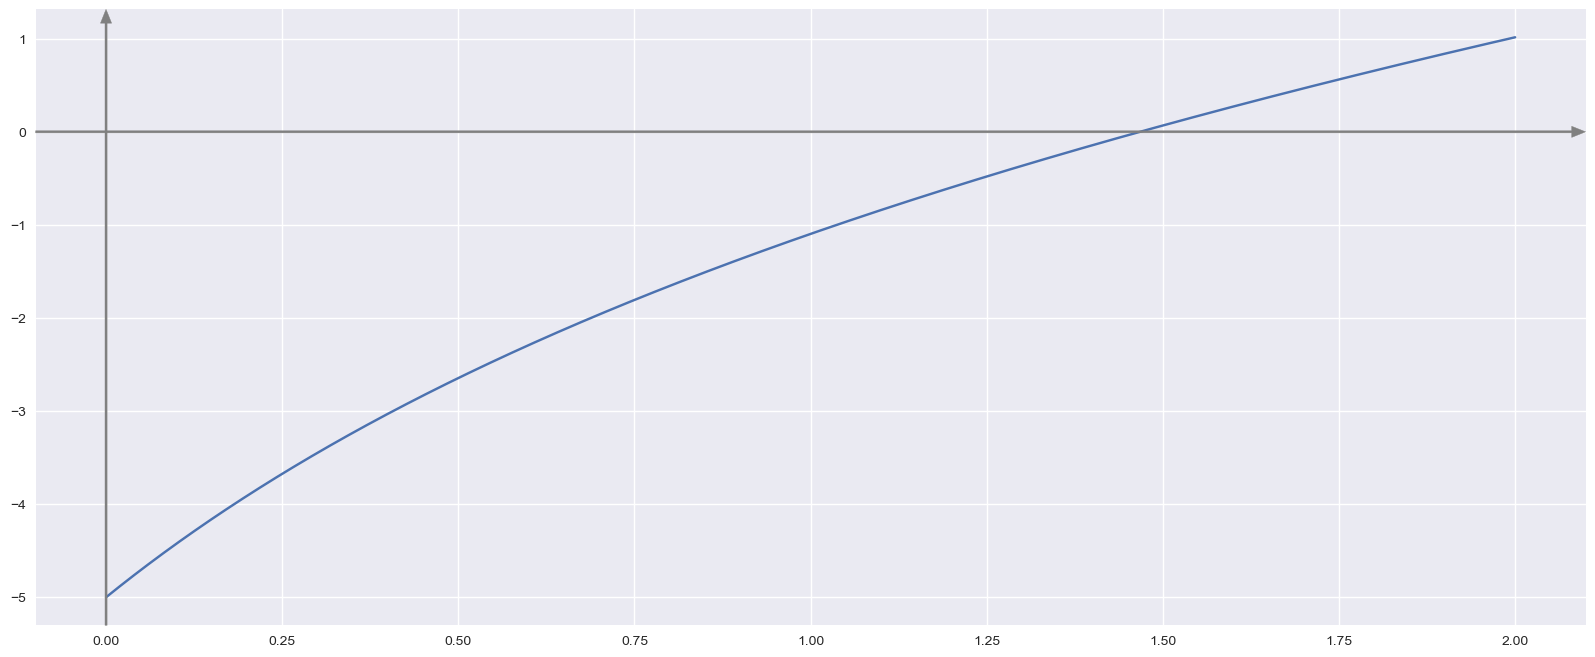

In [30]:
graficar(carga, 0, 2)

In [31]:
metodo_regulafalsi(carga,0,2)

Solución aproximada encontrada: 1.4674236346847285
número de iteraciones: 10


1.4674236346847285

# Punto 3

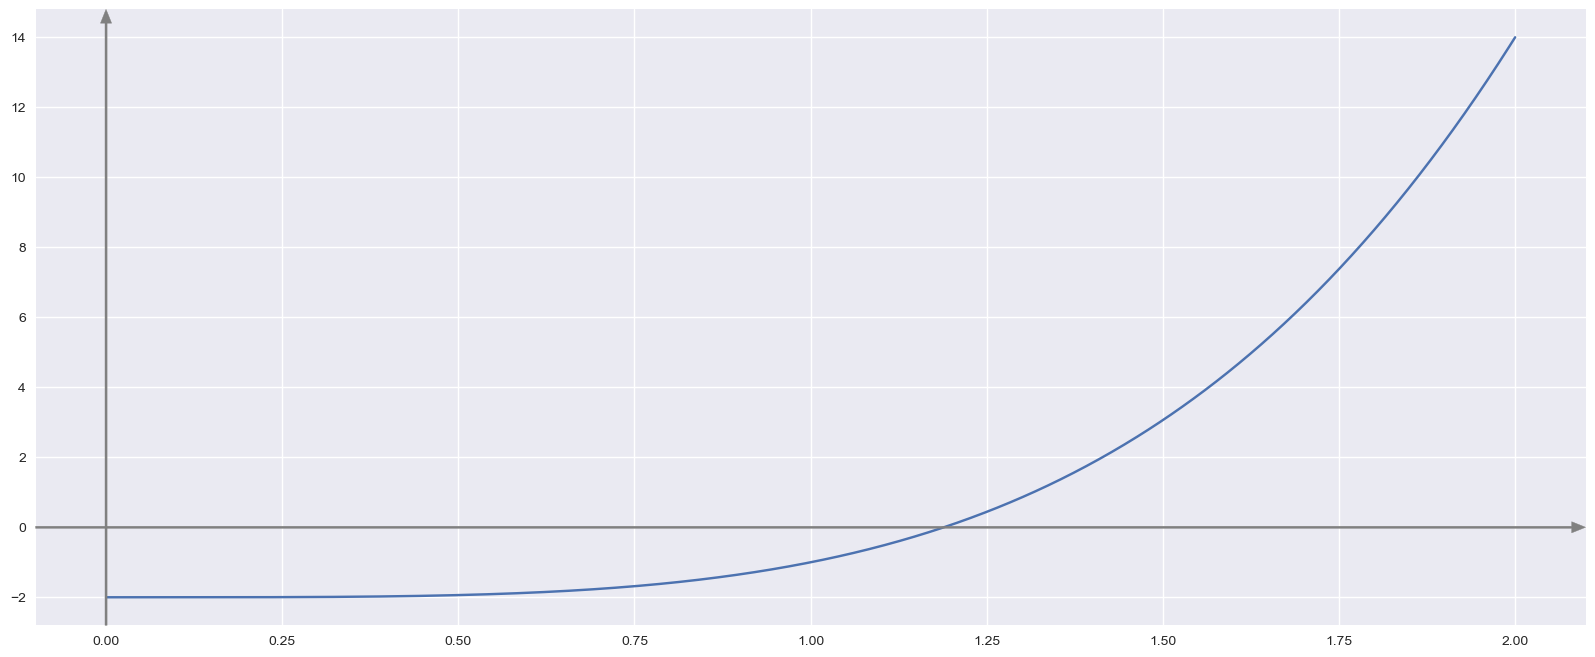

In [33]:
sol= lambda x: x**4 -2
dsol= lambda x: 4*x**3
graficar(sol,0,2)

In [34]:
metodo_biseccion(sol, 1, 2, tol=1e-5)
metodo_regulafalsi(sol, 1, 2, tol=1e-5)
metodo_newton_raphson(sol, dsol, 1, tol=1e-5)

Solución aproximada encontrada: 1.1892051696777344
número de iteraciones: 18
Solución aproximada encontrada: 1.1891956202320835
número de iteraciones: 20
Solución aproximada encontrada: 1.189207115002721
número de iteraciones: 5


1.189207115002721


# Punto 4

In [36]:
f2= lambda x: np.exp(x) + np.cos(x) - 2 * x**3 - np.log(x)
df2= lambda x: np.exp(x) - np.sin(x) - 6*x**2 - (1/x)

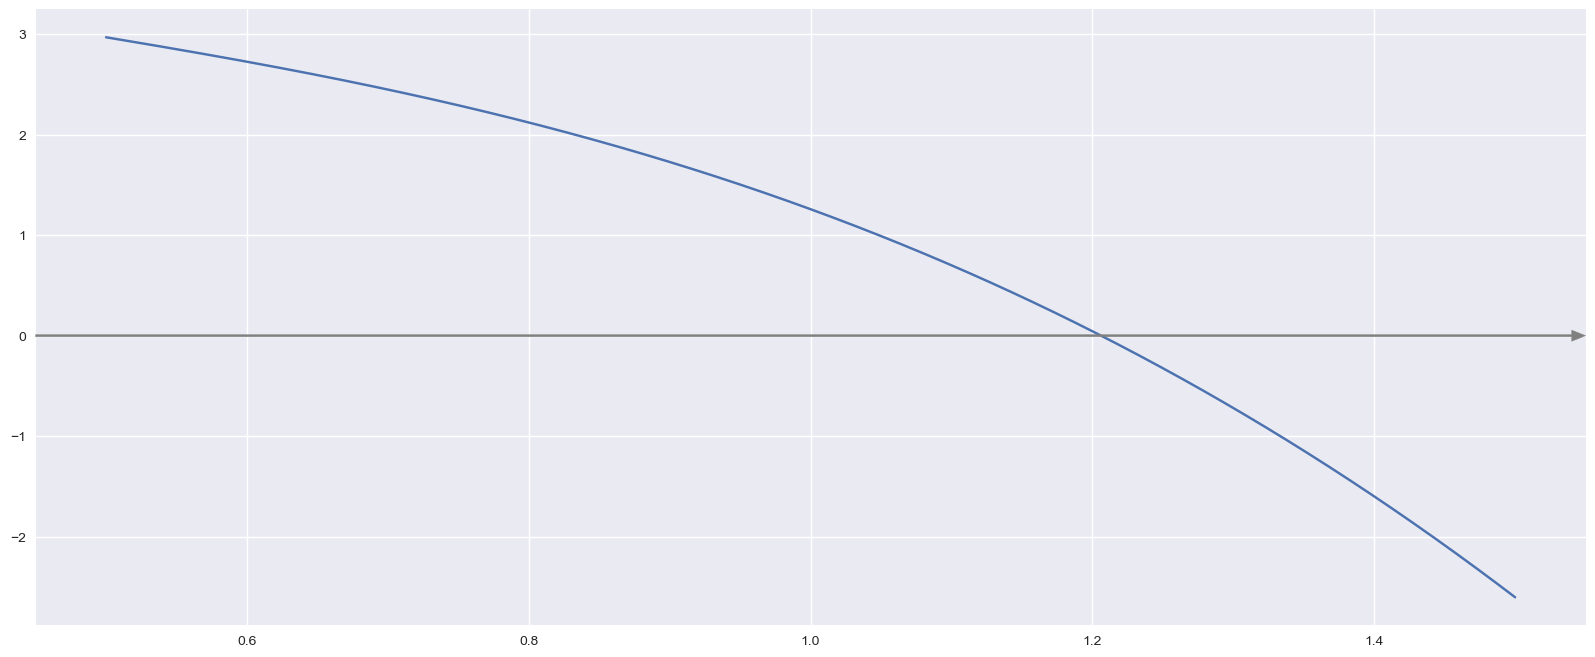

In [40]:
graficar(f2, 0.5, 1.5)

In [41]:
metodo_newton_raphson(f2, df2, 1, tol=1e-5)

Solución aproximada encontrada: 1.2062024622745684
número de iteraciones: 4


1.2062024622745684